### The following button allows to hide/unhide code cells:

In [7]:
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

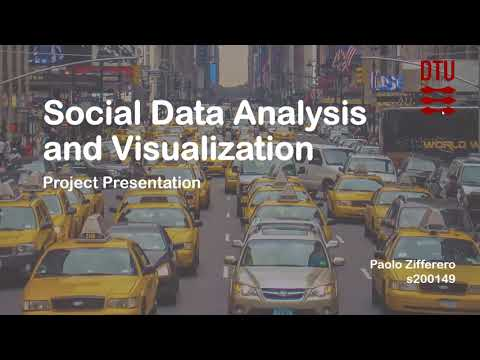

In [26]:
from IPython.display import YouTubeVideo
YouTubeVideo("19R-9QDh804",width=600, height=333)

# 1. Motivation
* What is your dataset?
$$$$
Motor Vehicle Collisions - Crashes dataset from [New York City OpenData](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95).
$$$$
* Why did you choose this/these particular dataset(s)?
$$$$
This dataset has been chosen since understanding patterns in car crashed could help in reducing the casualties of traffic and reduce the amount of resources spent every year when dealing with accidents.
$$$$
* What was your goal for the end user's experience?
$$$$
The goal is to visualize which are the most dangerous roads/intersections for each category of injury/casualty. This allows to see where preventive action could be most effective.

# 2. Basic stats
* Write about your choices in data cleaning and preprocessing
$$$$
The first step has been to create a ```Date``` column to store the date and time information properly.
$$$$
+ Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
$$$$
The dataset contains information about 1.7 million crashes in NYC, going from July 2012 to May 2021.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [9]:
df = pd.read_csv('C:/Users/czeta/Desktop/Crashes.csv')

df['Date'] = df['CRASH DATE'] + " " + df['CRASH TIME']
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M')

df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Hour'] = pd.to_datetime(df['CRASH TIME']).dt.hour
df['DayOfWeek'] = pd.DatetimeIndex(df['Date']).dayofweek
df['HourOfWeek'] = (df['Hour'].values + df['DayOfWeek'].values*24)

In [16]:
print("Total length of dataset: " + str(len(df)), end="\n\n")

print("First recorded crash:\t", np.min(df['Date']))
print("Last recorded crash:\t", np.max(df['Date']))

Total length of dataset: 1772882

First recorded crash:	 2012-07-01 00:05:00
Last recorded crash:	 2021-04-20 23:48:00


# 3. Data Analysis
* Describe your data analysis and explain what you've learned about the dataset.
$$$$
The amount of crashes per hour follows a strict pattern, having two spikes around 7-8 am and 3-4 pm.The weekends show just one peak around 5 pm and an increased number of crashes during night hours. Winter months have less occurencies than summer months.
$$$$
* If relevant, talk about your machine-learning.

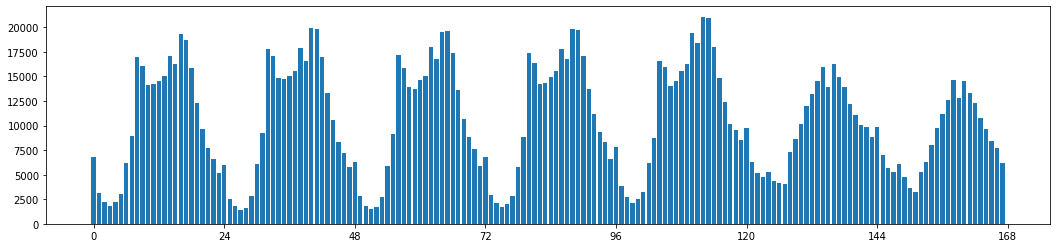

In [17]:
grouped = df.groupby(['HourOfWeek']).count()
grouped = grouped.reset_index()[['HourOfWeek', 'Month']]

plt.figure(figsize=(18,4))
plt.bar(grouped.HourOfWeek.values, grouped.Month.values)
plt.xticks(np.arange(0,168+1,24))
plt.show()

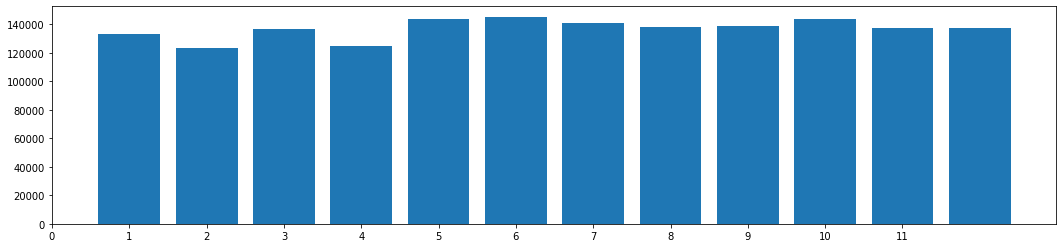

In [20]:
grouped3 = df[(df['Year']<2021) & (df['Year']>2012)].groupby(['Month']).count()
grouped3 = grouped3.reset_index()[['Month', 'Hour']]

plt.figure(figsize=(18,4))
plt.bar(grouped3.Month.values, grouped3.Hour.values)
plt.xticks(np.arange(0,12))
plt.show()

# 5. Visualizations
* Explain the visualizations you have chosen.
$$$$
Heatmaps and Augmented maps have been chosen for the purpose of showing which ares of NYC are the most dangerous because they can immediately point out specific areas with bright colours or an aggregation of elements.
$$$$
* Why are they right for the story you want to tell?
$$$$
The user can instantly get an idea of what is going on and feels confortable around a map that already knows. Furthermore, the ability to zoom in selected areas allows to deep dive into the visualization and get to the root of the problem.

In [21]:
hmap = folium.Map([40.76, -73.96], zoom_start=10.5, tiles='Stamen Toner')

heat_data = [[row['LATITUDE'],row['LONGITUDE']] for index, row in df[(df.LONGITUDE.isnull() == False) & ( df.LATITUDE.isnull()== False) & (df.Year>2017) & (df['NUMBER OF PERSONS KILLED']>0)].iterrows()]

HeatMap(heat_data, radius = 20).add_to(hmap)
hmap

## Map of most common intersections for every injury category
The map below shows the 10 roads/intersections most responsible for every injury/casualty category. Colours represent categories, the bigger the circle the highest the intersection in the top 10.

In [22]:
df_clean = df[(df.LONGITUDE.isnull() == False) & ( df.LATITUDE.isnull()== False)]
numbers_list = ['NUMBER OF PERSONS INJURED','NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED','NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED','NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED','NUMBER OF MOTORIST KILLED']

df_clean.replace('NaN', 0, inplace=True)

grouped2 = df_clean.groupby(['LATITUDE', 'LONGITUDE']).sum()[numbers_list]

C:\Users\czeta\Anaconda3\lib\site-packages\pandas\core\frame.py:4263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [24]:
top_10_persons_injured = grouped2.sort_values('NUMBER OF PERSONS INJURED', ascending=False).iloc[1:11].reset_index()
top_10_persons_killed = grouped2.sort_values('NUMBER OF PERSONS KILLED', ascending=False).iloc[1:11].reset_index()
top_10_pedestrians_injured = grouped2.sort_values('NUMBER OF PEDESTRIANS INJURED', ascending=False).iloc[1:11].reset_index()
top_10_pedestrians_killed = grouped2.sort_values('NUMBER OF PEDESTRIANS KILLED', ascending=False).iloc[1:11].reset_index()
top_10_cyclist_injured = grouped2.sort_values('NUMBER OF CYCLIST INJURED', ascending=False).iloc[1:11].reset_index()
top_10_cyclist_killed = grouped2.sort_values('NUMBER OF CYCLIST KILLED', ascending=False).iloc[1:11].reset_index()
top_10_motorist_injured = grouped2.sort_values('NUMBER OF MOTORIST INJURED', ascending=False).iloc[1:11].reset_index()
top_10_motorist_killed = grouped2.sort_values('NUMBER OF MOTORIST KILLED', ascending=False).iloc[1:11].reset_index()

top_10s = [top_10_persons_injured, top_10_persons_killed, top_10_pedestrians_injured, top_10_pedestrians_killed, top_10_cyclist_injured, top_10_cyclist_killed, top_10_motorist_injured, top_10_motorist_killed]

colors = ['red', 'grey', 'blue', 'yellow', 'green', 'orange', 'pink', 'lightblue']

mmap = folium.Map([40.76, -73.96], zoom_start=10.5, tiles='cartodbdark_matter')

for i, d in enumerate(top_10s):
    
    coor = [[row['LATITUDE'], row['LONGITUDE']]for index,row in d.iterrows()]
    for j, c in enumerate(coor):
        tooltip = str(d.columns[i+2]) + '\n Position number: '
        folium.CircleMarker(location=c, radius=(20-j), color=colors[i], fill=True, fill_color=colors[i],alpha=1, popup=str(tooltip + str(j+1))).add_to(mmap)
mmap

It is interesting to see how some areas are particularily dense with certain type of injuries. Downtown Manhattan, for example, holds 7 of the top 10 locations for cyclists injured.

# 6. Discussion
* What went well?
$$$$
Some key insights were drawn from the visualizations, proving that they are a great tool when dealing with a situation.
$$$$
* What is still missing? What could be improved?, Why?
$$$$
Weather data could be merged to the existing dataset to analyze the correlation between certain weather conditions and the occurence of specific types of crashes. In addition to that, the vehicle types have not been taken into consideration for this report, but they could provide even more useful insights for reducing the amount of car crashes


# 7. Contributions
* Contributions. Who did what?
You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took the lead role on certain portions of the work. That's what you should explain).
$$$$
s200149 is the only author.